# Pulsar Stars 

# Introduction


# Methods and Results

In [52]:
# First, we need to import the neccessary libraries
library(tidyverse)
library(tidymodels)
library(cowplot)
require(gridExtra)
library(GGally)
install.packages("themis")
library(themis)
set.seed(2024) 

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“package ‘GGally’ was built under R version 4.3.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



To begin, we will read the data frame and assign names to each column:

In [2]:
star_data <- read_csv("HTRU_2.csv", col_names = FALSE, show_col_types = FALSE) |>
    mutate(X9 = as_factor(X9))

colnames(star_data) <- c("integrated_profile_mean", "integrated_profile_std", 
                         "integrated_profile_excess_kurtosis","integrated_profile_skewness",
                         "dm_snr_curve_mean","dm_snr_curve_std",
                         "dm_snr_curve_excess_kurtosis","dm_snr_curve_skewness",
                         "is_pulsar_star")

head(star_data)

integrated_profile_mean,integrated_profile_std,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_std,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


**Table 1:** Pulsar Star Data

By using the `group_by` and `summarize` functions, we noticed the data is imbalanced, with 16259 negative results and 1639 positive results.

In [3]:
star_summary <- star_data |>
    group_by(is_pulsar_star) |> 
    summarize(count = n())

star_summary

is_pulsar_star,count
<fct>,<int>
0,16259
1,1639


**Table 2:** Unbalanced Pulsar Star Data

To balance the data, we will be using the function `step_upsample` from the Themis library. First, we will split the data into 75% training and 25% testing data. Then we will scale, center, and balance the data. Now, we can see that the data is balanced.

In [18]:
star_split <- initial_split(star_data, prop = 0.75, strata = is_pulsar_star)
star_training <- training(star_split)
star_testing <- testing(star_split)

head(star_training)

star_recipe <- recipe(is_pulsar_star ~., data = star_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(is_pulsar_star, over_ratio = 1, skip = FALSE) |>
    prep()

balanced_star <- bake(star_recipe, star_training) 

integrated_profile_mean,integrated_profile_std,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_std,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.6772575,14.860146,10.576487,127.39358,0
88.72656,40.67223,0.60086608,1.1234917,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.15832276,0.3895404,1.2207358,14.378941,13.539456,198.23646,0


**Table 3:** Pulsar Star Training Set

In [5]:
# To see that the data is balanced
balanced_stars <- balanced_star |>
    group_by(is_pulsar_star) |> 
    summarize(count = n())

balanced_stars

is_pulsar_star,count
<fct>,<int>
0,12197
1,12197


**Table 4:** Pulsar Star Balanced Data

We can also visulize the distribution of each of the eight variables for pulsar and non-pulsar stars.

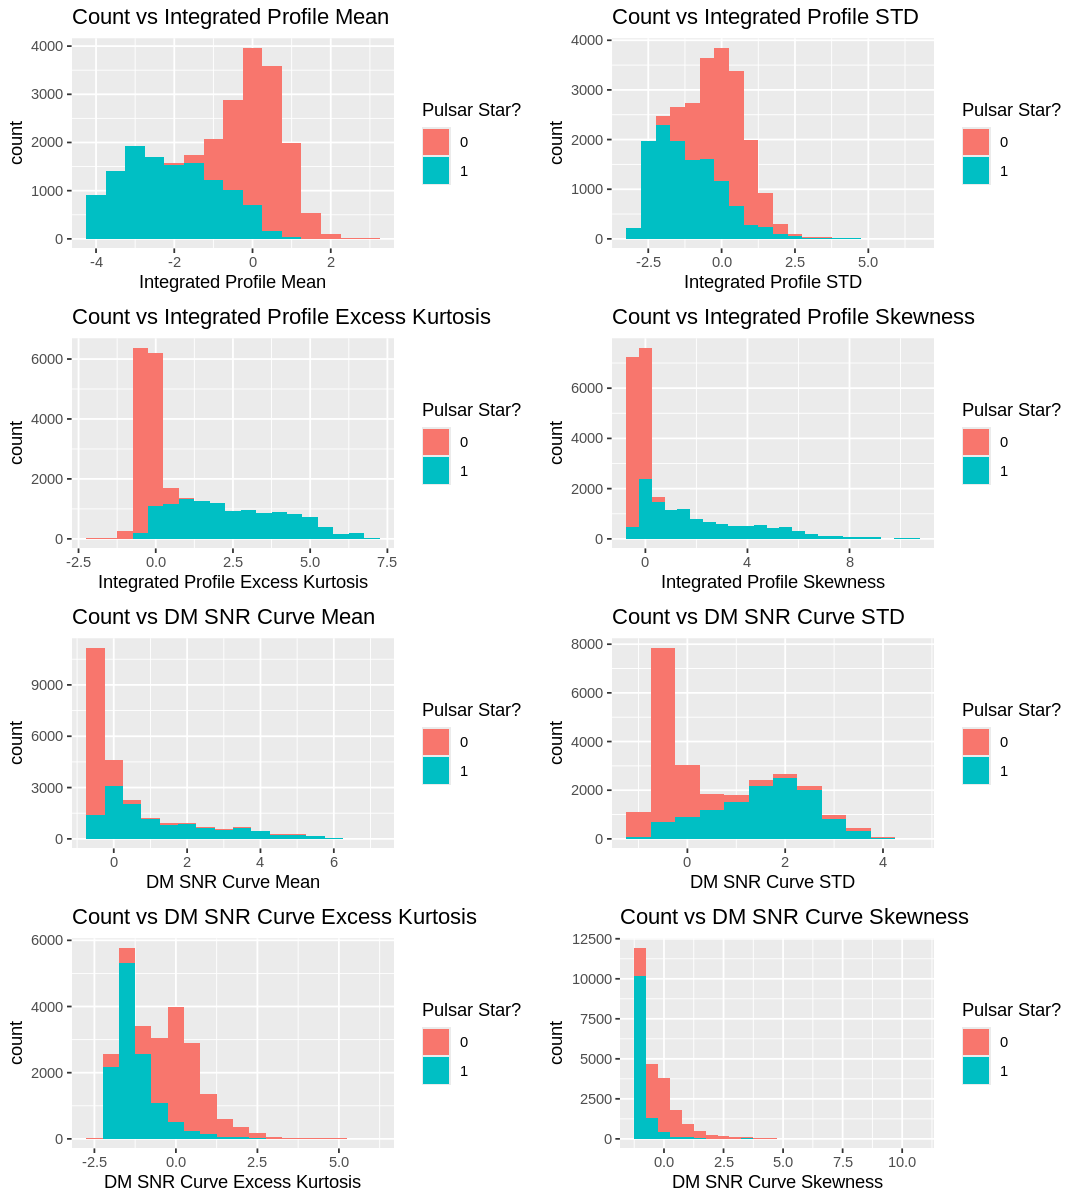

In [74]:
options(repr.plot.width = 9, repr.plot.height = 10)

integrated_profile_mean_graph <- balanced_star |>
    ggplot(aes(x = integrated_profile_mean, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Integrated Profile Mean", fill = "Pulsar Star?", title = "Count vs Integrated Profile Mean") 

integrated_profile_std_graph <- balanced_star |>
    ggplot(aes(x = integrated_profile_std, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Integrated Profile STD", fill = "Pulsar Star?", title = "Count vs Integrated Profile STD") 

integrated_profile_excess_kurtosis_graph <- balanced_star |>
    ggplot(aes(x = integrated_profile_excess_kurtosis, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Integrated Profile Excess Kurtosis", fill = "Pulsar Star?", title = "Count vs Integrated Profile Excess Kurtosis") 

integrated_profile_skewness_graph <- balanced_star |>
    ggplot(aes(x = integrated_profile_skewness, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Integrated Profile Skewness", fill = "Pulsar Star?", title = "Count vs Integrated Profile Skewness") 

dm_snr_curve_mean_graph <- balanced_star |>
    ggplot(aes(x = dm_snr_curve_mean, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "DM SNR Curve Mean", fill = "Pulsar Star?", title = "Count vs DM SNR Curve Mean") 

dm_snr_curve_std_graph <- balanced_star |>
    ggplot(aes(x = dm_snr_curve_std, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "DM SNR Curve STD", fill = "Pulsar Star?", title = "Count vs DM SNR Curve STD") 

dm_snr_curve_excess_kurtosis_graph <- balanced_star |>
    ggplot(aes(x = dm_snr_curve_excess_kurtosis, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "DM SNR Curve Excess Kurtosis", fill = "Pulsar Star?", title = "Count vs DM SNR Curve Excess Kurtosis") 

dm_snr_curve_skewness_graph <- balanced_star |>
    ggplot(aes(x = dm_snr_curve_skewness, fill = is_pulsar_star)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "DM SNR Curve Skewness", fill = "Pulsar Star?", title = "Count vs DM SNR Curve Skewness") 

grid.arrange(integrated_profile_mean_graph, 
             integrated_profile_std_graph, 
             integrated_profile_excess_kurtosis_graph, 
             integrated_profile_skewness_graph, 
             dm_snr_curve_mean_graph, 
             dm_snr_curve_std_graph, 
             dm_snr_curve_excess_kurtosis_graph, 
             dm_snr_curve_skewness_graph,
             ncol = 2)

**Figure 1:** Plots of Distribution of Variables

# Discussion



# References

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach MNRAS, 2016. https://doi.org/10.24432/C5DK6R.